In [1]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel

In [2]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [36]:
quark_0 = Particle(0.6, qrange, erange, eps=2e-2)
gluon_0 = Particle(1., qrange, erange, eps=2e-2, stat='b', d=16)

In [48]:
T = 0.15
G = 10
L = 0.5
screen = 1.5

In [49]:
ch_gluon_test = Channel(gluon_0, gluon_0, T, G=G, Fa=9/4,
                       da=1, ds=16, screen=screen, do_rel=1)

In [50]:
ch_gluon_test.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

In [51]:
ch_quark_test = Channel(quark_0, quark_0, T, G=G, screen=screen)
ch_quark_test.populate_T()

  0%|          | 0/201 [00:00<?, ?it/s]

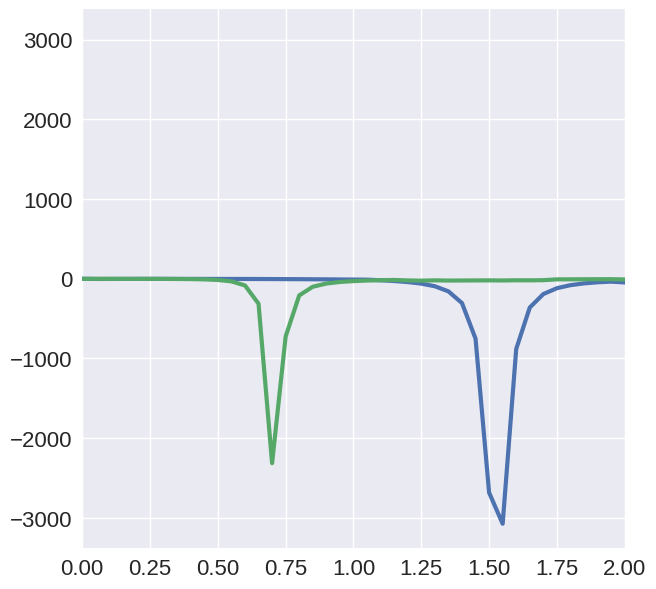

In [53]:
plt.plot(ch_gluon_test.erange, imag(ch_gluon_test.TM[:, 0]))
plt.xlim(0, 2)

plt.plot(ch_gluon_test.erange, imag(ch_quark_test.TM[:, 0]))


#### Boson G2 and fermionic integration

In [54]:
ch = ch_gluon_test

In [57]:
TM = np.array([[ch_quark_test.Tfunc(E, k, k, ch.T, ch.iV, ch.iOm, ch.iReG2, ch.iImG2, 5,
            int(np.sign(ch.G))) for k in ch.qrange]
            for E in tqdm.tqdm(ch.erange)])

  0%|          | 0/201 [00:00<?, ?it/s]

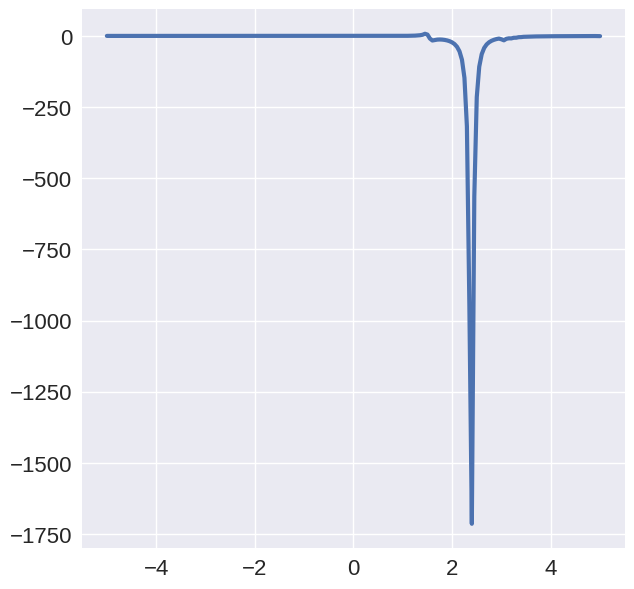

In [58]:
plt.plot(erange, imag(TM[:, 0]))

In [19]:
plt.plot(erange, real(TM[:, 0]))
plt.plot(ch_gluon_test.erange, real(ch_gluon_test.TM[:, 0]))

NameError: name 'TM' is not defined